# Семинар 2 – Линейные модели

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.simplefilter('ignore')

# 1. Постановка задачи

![picture](https://drive.google.com/uc?export=view&id=1pNRo9-N2Udjv3AK0uTJ0qCWkk9Ko_9TA)

Где линейная модель - это: $$ \hat{y} = f(x) = \theta_0*1 + \theta_1*x_1 + ... + \theta_n*x_n = \theta^T*X$$

Сгенерируем исскуственные данные, на основе функции:
$$f(x) = 4x+5$$

In [2]:
def lin_function(x):
    return 4*x+5

x_true = np.array([-2,2])
y_true = lin_function(x_true)


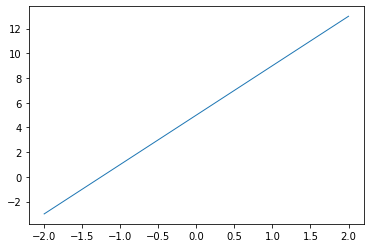

In [3]:
plt.plot(x_true, y_true, linewidth=1)
plt.show()

In [4]:
n = 100
x = np.random.rand(n,1)*4-2
e = np.random.rand(n,1)*4-2
y = lin_function(x) + e


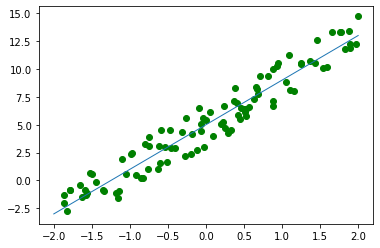

In [5]:
plt.scatter(x, y, color='g')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

# 2. Метрики

Mean Absoulte Error:
$$MAE = \frac1N \sum_{i = 1}^N|f(x_i) - y_i| = \frac1N \sum_{i = 1}^N|\hat y_i - y_i| = \frac1N || \hat Y - Y||_1$$

Mean Sqared Error:
$$MSE = \frac1N \sum_{i = 1}^N(f(x_i) - y_i)^2 = \frac1N \sum_{i = 1}^N(\hat y_i - y_i)^2 = \frac1N ||\hat Y - Y||_2$$


Почему работаем с MSE?

# 3. Аналитический метод поиска минимума по MCE

$$MSE -> min $$

$$\hat \theta = \bigl(X^T \cdot X  \bigr)^{-1} \cdot X^T \cdot y $$

In [6]:
x_matrix = np.c_[np.ones((n,1)),x]

In [7]:
%%time
thetha_matrix = # Ваш код здесь

SyntaxError: ignored

Обратите внимание на время работы

In [ ]:
thetha_matrix.T[0].tolist()

In [8]:
print("Свободный член: {[0][0]:.7}".format(thetha_matrix.T))
print("Коэфициент: {[0][1]:.7}".format(thetha_matrix.T))

NameError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

параметры

In [9]:
%%time
lr = LinearRegression()
lr.fit(x,y);

NameError: ignored

In [ ]:
print("Свободный член: {:.7}".format(lr.intercept_[0]))
print("Коэфициент: {:.7}".format(lr.coef_[0][0]))

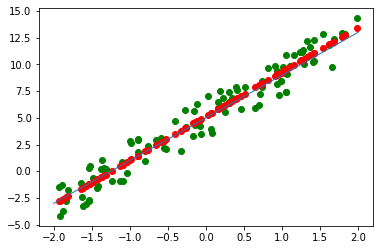

In [ ]:
plt.scatter(x, y, color='g')
plt.scatter(x, lr.predict(x), color='r')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

 # 4. Градиентный спуск

$$\theta^{(t+1)} = \theta^{(t)} - lr\cdot \nabla MSE(\theta^{(t)}),$$
где $lr$ — длина шага градиентного спуска (learning rate).

$$\nabla MSE(\theta)= \frac{2}{N} X^T \cdot \bigl(X \cdot \theta - Y \bigr) $$

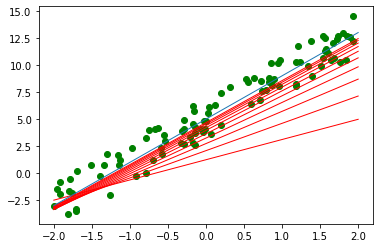

[[5.15860585]
 [3.89037025]]
CPU times: user 160 ms, sys: 0 ns, total: 160 ms
Wall time: 159 ms


In [ ]:
%%time
lr = 0.1  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = # Ваш код здесь
    theta = # Ваш код здесь

plt.plot(x_true, y_true, linewidth=1)
plt.show()

print(theta)

## Слишком маленький шаг обучения (learning rate)

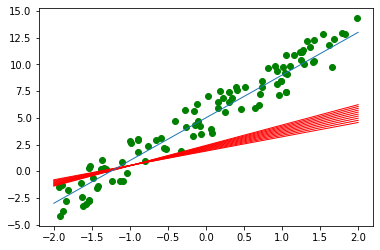

In [ ]:
lr = 0.01  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = # Ваш код здесь
    theta = # Ваш код здесь

plt.plot(x_true, y_true, linewidth=1)
plt.show()

## Слишком большой шаг обучения (learning rate)

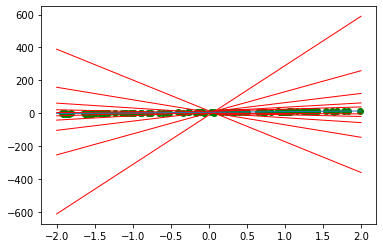

In [ ]:
lr = 1.01  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = # Ваш код здесь
    theta = # Ваш код здесь

plt.plot(x_true, y_true, linewidth=1)
plt.show()

## Уменьшение шага на каждой итерации

In [ ]:
lr = 1  # learning rate
n_iterations = 1000

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = # Ваш код здесь
    theta = # Ваш код здесь


print(theta)

[[5.16588465]
 [4.14849683]]




Learning rate - гипперпараметр, и можно воспользоваться GridSearchCV, однако чтобы не учить каждый раз такое кол-во итераций, мы можем измерять норму градиента, и прекращать спуск, когда он "затух"

In [ ]:
lr = 1  # learning rate
n_iterations = 1000
tol = 0.00001

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = # Ваш код здесь
    if # Ваш код здесь:
        break
    theta = # Ваш код здесь

print('Градиент затух на {} итерации '.format(iteration))
print(theta)

Градиент затух на 172 итерации 
[[5.16588547]
 [4.14849302]]


__Реализация в Scikit-Learn отсутствует__
  
  

# 5. Cтохастический градиентный спуск  

у среднего случайных подвыборок то же что и у всех данных

In [ ]:
n_epochs = 100

def learning_schedule(t):
    return t0 / (t + t1)

t0, t1 = 5, 100  # learning schedule hyperparameters


theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(n):
        random_index = np.random.randint(n)
        xi = # Ваш код здесь
        yi = # Ваш код здесь
        gradients = # Ваш код здесь
        lr = # Ваш код здесь
        theta = # Ваш код здесь
print(theta)

[[5.17039667]
 [4.15116695]]


# 6. Пакетный градиентный спуск  

In [ ]:
n_epochs = 100

def learning_schedule(t):
    return t0 / (t + t1)

t0, t1 = 5, 100  # learning schedule hyperparameters


theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(n):
        random_index = np.random.randint(n)
        xi = # Ваш код здесь
        yi = # Ваш код здесь
        gradients = # Ваш код здесь
        lr = # Ваш код здесь
        theta = # Ваш код здесь
print(theta)

[[5.15661728]
 [4.17774024]]


In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd = SGDRegressor(tol=0.0001)
#The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).
sgd.fit(x,y)
sgd.intercept_, sgd.coef_

(array([5.15634056]), array([4.14339689]))

# 7. Функции потерь в регрессии

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
with open('./gdrive/My Drive/Colab Notebooks/Семинар 3/data_preprocessed.json') as file:
    X = pd.read_json(file)

In [ ]:
X_subset = X[[7, 15]].values
# add two outliers
X_subset_modified = np.vstack((X_subset, [[1, 90], [2, 50]]))

In [ ]:
def scatter_points_and_plot_line_MSE(X_subset):
    plt.scatter(X_subset[:, 0], X_subset[:, 1])
    lr = LinearRegression()
    lr.fit(X_subset[:, 0][:, None], X_subset[:, 1])
    grid = np.linspace(0, 2, 100)
    line = lr.predict(grid[:, None])
    plt.plot(grid, line)

Text(0.5, 0, 'x')

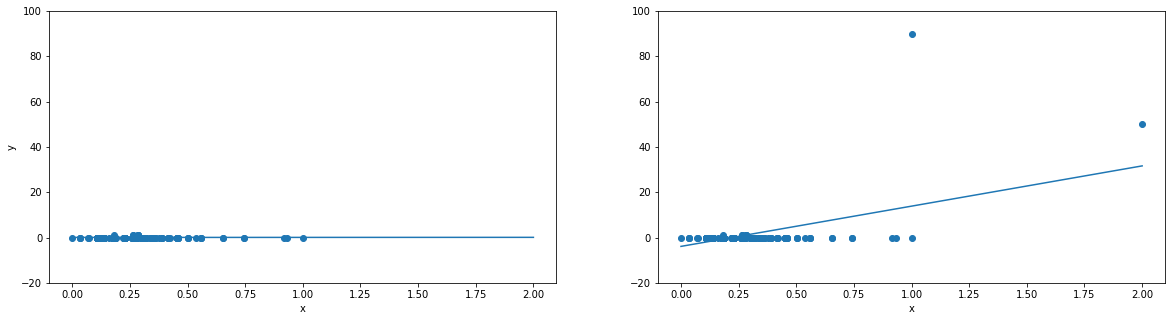

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MSE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MSE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")

Из-за шумовых объектов прямая достаточно сильно изменила наклон. Поэтому вместо MSE часто используют Mean Absoulte Error:
$$L(y_i, a(x_i)) = |y_i - a(x_i)|$$

Теперь обучим регрессию, оптимизируя MAE. В sklearn такая регрессия не реализована, но можно использовать модуль statsmodels

In [ ]:
!pip install statsmodels==0.11.1
import statsmodels.api as sm
import statsmodels.formula.api as smf

     |████████████████████████████████| 8.7MB 2.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Text(0.5, 0, 'x')

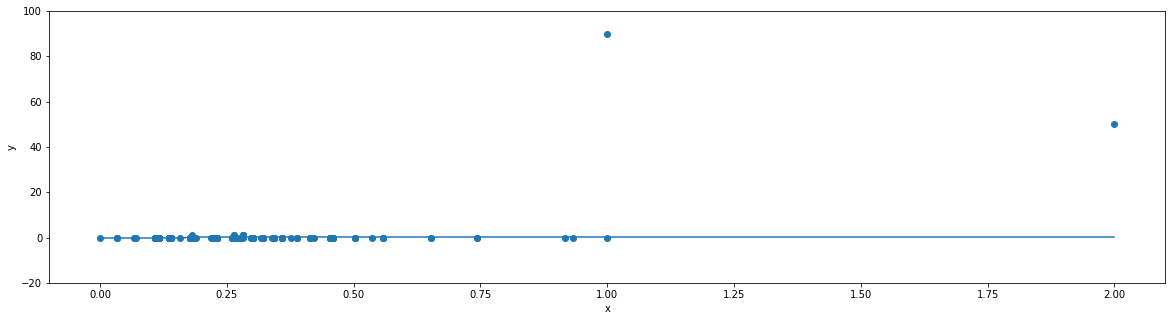

In [ ]:
plt.figure(figsize=(20, 5))
plt.ylabel("y")
mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data=X_subset_modified, columns=["f7", "f15"])) # задаеем зависимость и передаем данные
res = mod.fit(q=0.5)
plt.scatter(X_subset_modified[:, 0], X_subset_modified[:, 1])   # визуализируем точки
grid = np.linspace(0, 2, 100)
plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])   # визуализируем прямую
plt.ylim(-20, 100)
plt.xlabel("x")

Прямая не изменила направление из-за выбросов.

Попробуем добавить больше шумовых объектов:

In [ ]:
X_subset_modified_twice = np.vstack((
    X_subset_modified, 
    np.random.randint(5, size=60).reshape(-1, 2) * [1, 30],
))

Text(0.5, 0, 'x')

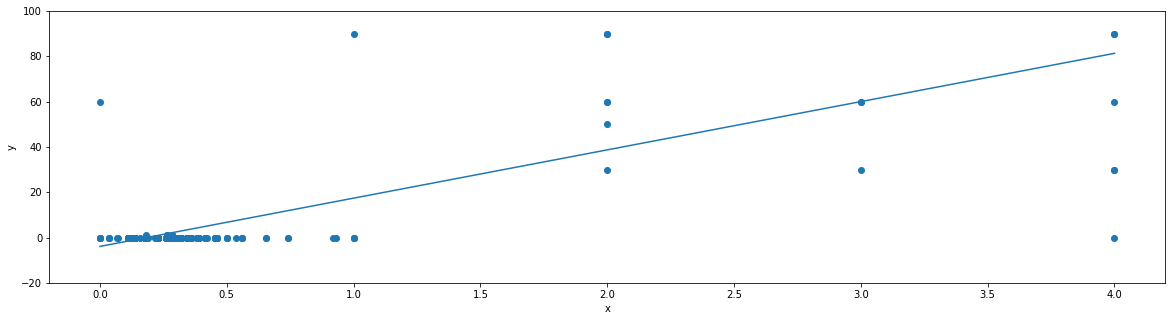

In [ ]:
plt.figure(figsize=(20, 5))
plt.ylabel("y")
mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data=X_subset_modified_twice, columns=["f7", "f15"])) # задаеем зависимость и передаем данные
res = mod.fit(q=0.5)
plt.scatter(X_subset_modified_twice[:, 0], X_subset_modified_twice[:, 1])   # визуализируем точки
grid = np.linspace(0, 4, 200)
plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])   # визуализируем прямую
plt.ylim(-20, 100)
plt.xlabel("x")

Прямая изменила наклон, когда мы добавили 30 (почти 15%) шумовых точек.

# 7. Мультиколлинеарность и регуляризация

In [ ]:
# !pip install seaborn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Для оценка качества работы наших алгоритмов будем использовать коэфициент детерминации:

$$R^2 = 1 - \frac{\sum_i (y_i - a(x_i))^2}{\sum_i (y_i - \overline{y}_i)^2}$$


## Решение задачи МНК

In [ ]:
def my_linear_regression(X_train, Y_train):
    return np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [ ]:
def predict(X, w):
    return np.dot(X, w)

## Загрузим датасет

https://habrahabr.ru/post/206306/

In [ ]:
data = pd.read_csv('energy_efficiency.csv')

FileNotFoundError: ignored

Для примера решения задачи прогнозирования, я взял набор данных Energy efficiency из крупнейшего репозитория UCI.   

В нем $X_1 ... X_8$ — характеристики помещения на основании которых будет проводиться анализ, а $y_1,y_2$ — значения нагрузки, которые надо спрогнозировать.
- $X_1$	Относительная компактность
- $X_2$	Площадь
- $X_3$	Площадь стен
- $X_4$	Площадь потолка	
- $X_5$	Общая высота	
- $X_6$	Ориентация
- $X_7$	Площадь остекления	
- $X_8$	Распределенная площадь остекления	
- $y_1$	Нагрузка при обогреве
- $y_2$	Нагрузка при охлаждении

In [ ]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Посмотрим на скоррелированность данных

In [ ]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430,0.895785
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


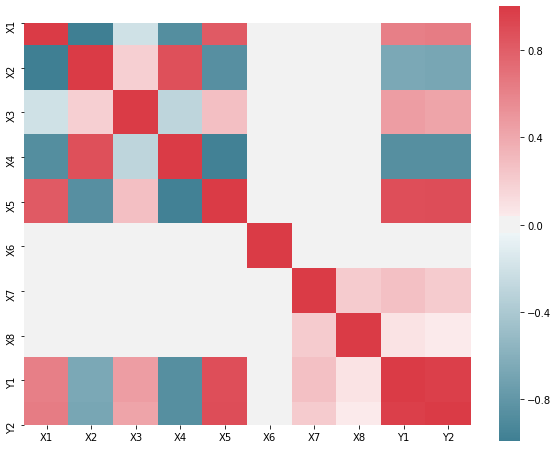

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))

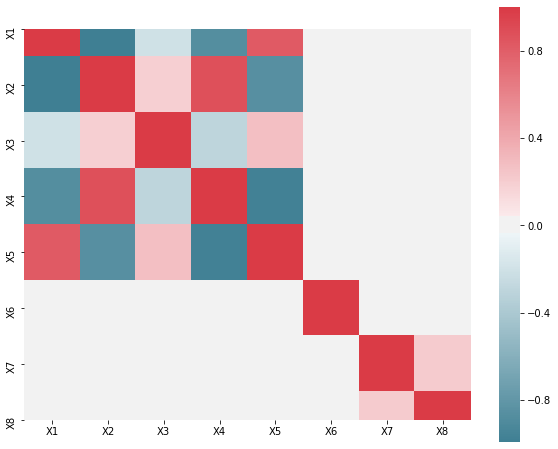

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = # Ваш код здесь
sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))

Видим, что x1 скоррелирован с x2, а x4 с x5. Из-за этого матрица $X^{T}*X$ необратима.

## Посмотрим как на таких данных отработает наша линейная регрессия

Разобьем выборку на train и test

In [ ]:
X = data.drop(['Y1','Y2'], axis=1)
y = data['Y1']

In [ ]:
X.shape, y.shape

((768, 8), (768,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим регрессию и посмотрим на качество

In [ ]:
w = my_linear_regression(X_train, y_train)

In [ ]:
y_train_pred = predict(X_train, w)
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train R2: ", r2_score(y_train, y_train_pred))

Train MSE:  417168.2213821891
Train R2:  -4132.492369591635


In [ ]:
y_test_pred = predict(X_test, w)
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Test MSE:  460128.72662043874
Test R2:  -4413.449687872916


Как-то не очень

## Попробуем убрать скоррелированные признаки

In [ ]:
X = # Ваш код здесь
y = data['Y1']

In [ ]:
X.shape, y.shape

((768, 6), (768,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим регрессию и посмотрим на качество

In [ ]:
w = my_linear_regression(X_train, y_train)

In [ ]:
y_train_pred = predict(X_train, w)
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train R2: ", r2_score(y_train, y_train_pred))

Train MSE:  9.851958700759099
Train R2:  0.9023823147885197


In [ ]:
y_test_pred = predict(X_test, w)
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Test MSE:  11.387213360639421
Test R2:  0.8907517015187721


Юху! Получили алгоритм с хорошим качеством

## Реализуем линейную регрессию с L2 регуляризацией

In [ ]:
def my_linear_regression(X_train, Y_train, l2=0):
    return # Ваш код здесь

Обучим регрессию с регуляризацией и посмотрим на качество

In [ ]:
X = data.drop(['Y1','Y2'], axis=1)
y = data['Y1']

In [ ]:
X.shape, y.shape

((768, 8), (768,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
w = my_linear_regression(X_train, y_train, l2=0.001)

In [ ]:
y_train_pred = predict(X_train, w)
print("Train MSE: ", mean_squared_error(y_train, y_train_pred))
print("Train R2: ", r2_score(y_train, y_train_pred))

Train MSE:  8.566900337804904
Train R2:  0.9151152571975837


In [ ]:
y_test_pred = predict(X_test, w)
print("Test MSE: ", mean_squared_error(y_test, y_test_pred))
print("Test R2: ", r2_score(y_test, y_test_pred))

Test MSE:  9.4639612678421
Test R2:  0.9092032762837478


Этого же эффекта(отсутствие переобучения) добились добавив регуляризацию